In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Modeling prior predictive distribution

In [2]:
gen_quant = CmdStanModel(stan_file='prior_predictive.stan')
samples = gen_quant.sample( fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()
df


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,13.0,0.188948
1,0.0,0.0,50.0,11.0,0.205914
2,0.0,0.0,50.0,5.0,0.124198
3,0.0,0.0,50.0,11.0,0.221160
4,0.0,0.0,50.0,4.0,0.116747
...,...,...,...,...,...
995,0.0,0.0,50.0,7.0,0.152028
996,0.0,0.0,50.0,6.0,0.181205
997,0.0,0.0,50.0,12.0,0.217265
998,0.0,0.0,50.0,12.0,0.248545


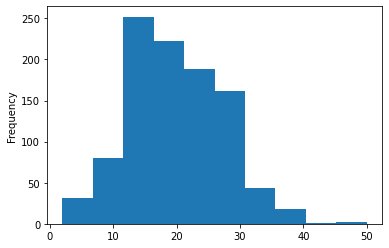

Mean of the ratio: 19.744 %


In [14]:
df_ratio = (df["y"] / df["N"]) * 100
df_ratio.plot.hist(bins=10)
plt.show()

print("Mean of the ratio: " + str(df_ratio.mean()) + " %")

## Modeling posterior and posterior predictive distribution

In [11]:
data_in={'N':50, 
         "y":7}

gen_quant2 = CmdStanModel(stan_file='posterior_predictive.stan')
samples2 = gen_quant2.sample(data=data_in,
                            fixed_param=True,  
                            iter_warmup=0, 
                            chains = 1)

df2 = samples2.draws_pd()
df2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.240651,14.0
1,0.0,0.0,0.240651,8.0
2,0.0,0.0,0.240651,11.0
3,0.0,0.0,0.240651,17.0
4,0.0,0.0,0.240651,11.0
...,...,...,...,...
995,0.0,0.0,0.240651,15.0
996,0.0,0.0,0.240651,13.0
997,0.0,0.0,0.240651,8.0
998,0.0,0.0,0.240651,13.0


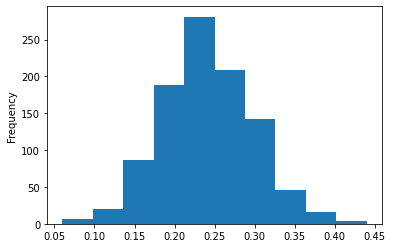

Mean of the ratio: 24.120000000000005 %


In [15]:
df_ratio2 = (df2["y_pred"] / data_in['N'])
df_ratio2.plot.hist(bins=10)
plt.show()

print("Mean of the ratio: " + str(df_ratio2.mean() * 100) + " %")

In [17]:
predicted_ratio = az.summary(np.array(df_ratio2), hdi_prob=0.94)
print("Summary for predicted ratio: \n" + str(predicted_ratio))

parameter_p = az.summary(np.array(df2['p']), hdi_prob=0.94)
print("\nSummary for parameter p: \n" + str(parameter_p))

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Summary for predicted ratio: 
    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
x  0.241  0.06    0.14     0.36      0.002    0.001    1029.0     958.0    NaN

Summary for parameter p: 
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
x  0.241  0.0   0.241    0.241        0.0      0.0    1000.0    1000.0    NaN


In [20]:
p_traditional = 0.2

lower_ratio_counter = (df_ratio2 < p_traditional).sum()

lower_ratio_probability = lower_ratio_counter / len(df_ratio2)
print("Probability that ratio is lower than the average probability from traditional vaccines:\n" + str(lower_ratio_probability))

Probability that ratio is lower than the average probability from traditional vaccines:
0.187
